In [1]:
import community
import infomap
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
from torch import seed
from torch_geometric.utils.convert import to_networkx
from torch_geometric.datasets import Planetoid

/home/newdisk/jxh/anaconda/envs/sn/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = Planetoid(root='./', name='Cora')
data = dataset[0]
G = to_networkx(data)
G_undirected = G.to_undirected()
pos = nx.spring_layout(G)

In [2]:
def louvain(G, pos):
    # compute the best partition
    # partition = community_louvain.best_partition(G)
    # print(partition.values())
    # print(partition.keys())
    partition = nx.algorithms.community.louvain_communities(G, seed=2001)
    # print(partition)

    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', len(partition))
    nodes = []
    comm = []
    # print(len(partition))
    for i in range(len(partition)):
        # print(i)
        nodes = nodes + list(partition[i])
        comm = comm + [i] * len(partition[i])
    nx.draw_networkx_nodes(G, pos, nodes, node_size=15,
                           cmap=cmap, node_color=comm)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

    partition_dict = {k: v for k, v in zip(nodes, comm)}
    # print(max(partition_dict.values()))
    modularity = community.modularity(partition_dict, G)
    print([max(partition_dict.values()) + 1, modularity])

    return len(partition)

def random_walk(G, pos):
    infomapWrapper = infomap.Infomap("--two-level --silent")
    for e in G.edges():
        infomapWrapper.addLink(*e)
    infomapWrapper.run()
    tree = infomapWrapper

    partition = {}
    for node in tree.nodes:
        partition[node.node_id] = node.module_id

    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=15,
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

    modularity = community.modularity(partition, G)
    print([max(partition.values()) + 1, modularity])

    return tree.numTopModules()


def label_propagation(G, pos):
    # compute the best partition
    partition = nx.algorithms.community.label_propagation_communities(G)
    keys, values = [], []
    for i, item in enumerate(partition):
        keys = keys + list(item)
        values = values + [i] * len(item)
    partition_dict = {k:v for k, v in zip(keys, values)}
    cmap = cm.get_cmap('viridis', max(partition_dict.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition_dict.keys(), node_size=15,
                           cmap=cmap, node_color=list(partition_dict.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

    modularity = community.modularity(partition_dict, G)
    print([max(partition_dict.values()) + 1, modularity])
    return max(partition_dict.values()) + 1

louvian test


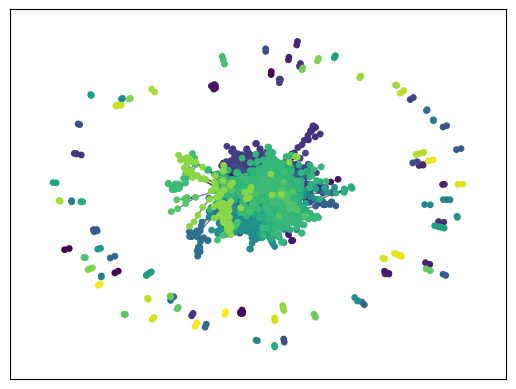

[104, 0.8129988192675199]
infomap test


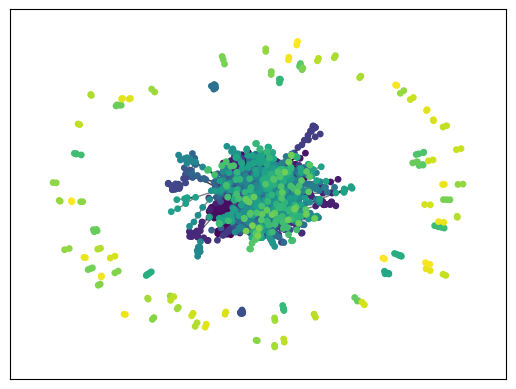

[287, 0.7268666069527777]
label_propagation test


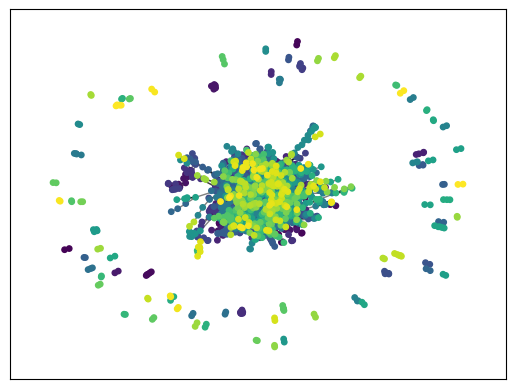

[454, 0.6722252427767137]


454

In [5]:
print("louvian test")
louvain(G_undirected, pos)

print("infomap test")
random_walk(G_undirected, pos)

print("label_propagation test")
label_propagation(G_undirected, pos)